In [1]:
import torch.nn as nn


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.act = nn.ReLU()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=3, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=3, out_channels=3, kernel_size=3)
        self.conv3 = nn.Conv1d(in_channels=3, out_channels=1, kernel_size=3)
        self.fcn = nn.Linear(in_features=100, out_features=2)


    def forward(self, x):
        return x

In [2]:
import numpy as np

frequency = 100

samples = 2**8

t = np.linspace(0, 1, samples)
sine = 0.1 * np.sin(frequency * 2 * np.pi * t)
print(sine.shape)

(256,)


In [3]:
!pip install colorednoise

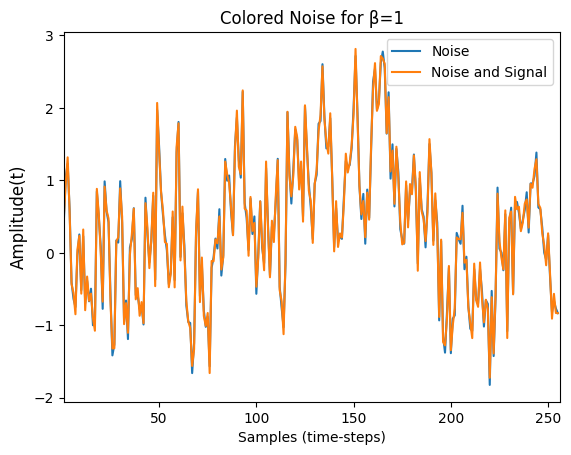

In [4]:
import colorednoise as cn
import matplotlib.pyplot as plt

beta = 1  # pink noise is 1

noise = cn.powerlaw_psd_gaussian(beta, samples)
plt.plot(noise, label='Noise')
plt.plot(noise+sine, label='Noise and Signal')
plt.title('Colored Noise for β='+str(beta))
plt.xlabel('Samples (time-steps)')
plt.ylabel('Amplitude(t)', fontsize='large')
plt.xlim(1,samples)
plt.legend()
plt.show()

In [8]:
data = []
labels = []
for i in range(10000):
    if np.random.randint(low=0.0, high=2.0):
        data.append(cn.powerlaw_psd_gaussian(beta, samples))
        labels.append([1,0])
    else:
        data.append(cn.powerlaw_psd_gaussian(beta, samples) + sine)
        labels.append([0,1])

data = np.stack(data)
labels = np.stack(labels)
print(data.shape)
print(labels.shape)

(10000, 256)
(10000, 2)
